In [1]:
from sympy import*
from IPython.display import Image, display, HTML
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib qt

# Homework 5.

## Homework 4.

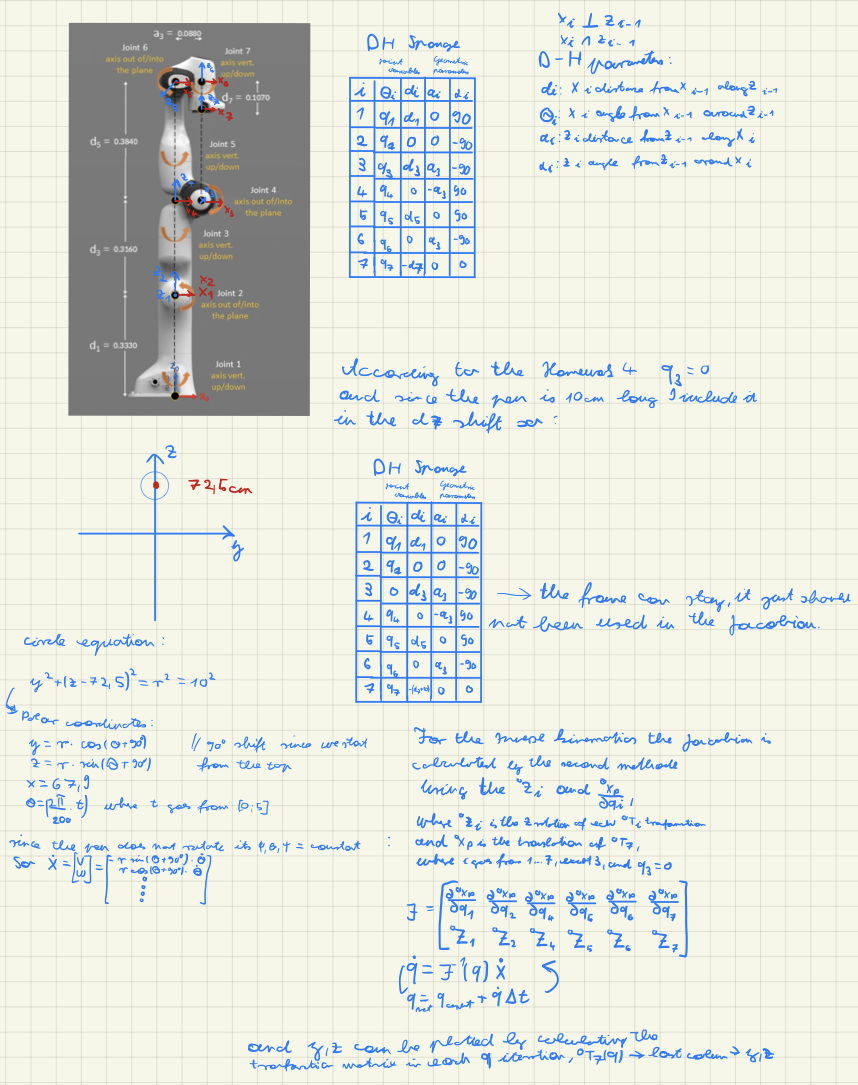

In [2]:
Image("Doc.png")

In [3]:
q1,q2,q3,q4,q5,q6,q7,d1,d3,d5,d7,a3=symbols('q_1 q_2 q_3 q_4 q_5 q_6 q_7 d_1 d_3 d_5 d_7 a_3') #symbols

The transformation matrixes are calculated.

In [4]:
def DH_Tr_sym_UMD(theta=0, d=0 , a=0, alpha=0):
    Tr_theta=Matrix([[cos(theta),-sin(theta),0,0],
                       [sin(theta),cos(theta),0,0],
                       [0,0,1,0],
                       [0,0,0,1]])
    Tr_d=Matrix([[1,0,0,0],
                   [0,1,0,0],
                   [0,0,1,d],
                   [0,0,0,1]])
    Tr_a=Matrix([[1,0,0,a],
                   [0,1,0,0],
                   [0,0,1,0],
                   [0,0,0,1]])
    Tr_alpha=Matrix([[1,0,0,0],
                       [0,cos(alpha),-sin(alpha),0],
                       [0,sin(alpha) ,cos(alpha),0],
                       [0,0,0,1]])
    
    
    Tr_KHALIL=Tr_theta@Tr_d@Tr_a@Tr_alpha
    
    return Tr_KHALIL

In [5]:
H_01=DH_Tr_sym_UMD(theta=q1, d=d1 , a=0, alpha=pi/2)
H_01

Matrix([
[cos(q_1), 0,  sin(q_1),   0],
[sin(q_1), 0, -cos(q_1),   0],
[       0, 1,         0, d_1],
[       0, 0,         0,   1]])

In [6]:
H_12=DH_Tr_sym_UMD(theta=q2, d=0 , a=0, alpha=-pi/2)
H_02=H_01@H_12
H_02

Matrix([
[cos(q_1)*cos(q_2), -sin(q_1), -sin(q_2)*cos(q_1),   0],
[sin(q_1)*cos(q_2),  cos(q_1), -sin(q_1)*sin(q_2),   0],
[         sin(q_2),         0,           cos(q_2), d_1],
[                0,         0,                  0,   1]])

In [7]:
H_23=DH_Tr_sym_UMD(theta=q3, d=d3 , a=a3, alpha=-pi/2)
H_03=H_01@H_12@H_23
H_03

Matrix([
[-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3), sin(q_2)*cos(q_1), -sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2), -a_3*sin(q_1)*sin(q_3) + a_3*cos(q_1)*cos(q_2)*cos(q_3) - d_3*sin(q_2)*cos(q_1)],
[ sin(q_1)*cos(q_2)*cos(q_3) + sin(q_3)*cos(q_1), sin(q_1)*sin(q_2), -sin(q_1)*sin(q_3)*cos(q_2) + cos(q_1)*cos(q_3),  a_3*sin(q_1)*cos(q_2)*cos(q_3) + a_3*sin(q_3)*cos(q_1) - d_3*sin(q_1)*sin(q_2)],
[                              sin(q_2)*cos(q_3),         -cos(q_2),                              -sin(q_2)*sin(q_3),                                      a_3*sin(q_2)*cos(q_3) + d_1 + d_3*cos(q_2)],
[                                              0,                 0,                                               0,                                                                               1]])

In [8]:
H_34=DH_Tr_sym_UMD(theta=q4, d=0 , a=-a3, alpha=pi/2)
H_04=H_01@H_12@H_23@H_34
H_34

Matrix([
[cos(q_4), 0,  sin(q_4), -a_3*cos(q_4)],
[sin(q_4), 0, -cos(q_4), -a_3*sin(q_4)],
[       0, 1,         0,             0],
[       0, 0,         0,             1]])

In [9]:
H_45=DH_Tr_sym_UMD(theta=q5, d=d5 , a=0, alpha=pi/2)
H_05=H_01@H_12@H_23@H_34@H_45
H_45

Matrix([
[cos(q_5), 0,  sin(q_5),   0],
[sin(q_5), 0, -cos(q_5),   0],
[       0, 1,         0, d_5],
[       0, 0,         0,   1]])

In [10]:
H_56=DH_Tr_sym_UMD(theta=q6, d=0 , a=a3, alpha=-pi/2)
H_06=H_01@H_12@H_23@H_34@H_45@H_56
H_56

Matrix([
[cos(q_6),  0, -sin(q_6), a_3*cos(q_6)],
[sin(q_6),  0,  cos(q_6), a_3*sin(q_6)],
[       0, -1,         0,            0],
[       0,  0,         0,            1]])

In [11]:
H_67=DH_Tr_sym_UMD(theta=q7, d=-d7 , a=0, alpha=0)
H_07=H_06*H_67
H_67
H_07

Matrix([
[((((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*cos(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*sin(q_5))*cos(q_6) + ((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4))*sin(q_6))*cos(q_7) + (-((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*sin(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*cos(q_5))*sin(q_7), -((((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*cos(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*sin(q_5))*cos(q_6) + ((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4))*sin(q_6))*sin(q_7) + (-((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*sin(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*cos(q_5))*cos(q_7), -(((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*

In [12]:
H_07.subs({q3:0})[2,3]

a_3*(sin(q_2)*sin(q_4) + cos(q_2)*cos(q_4))*sin(q_6) + a_3*(sin(q_2)*cos(q_4) - sin(q_4)*cos(q_2))*cos(q_5)*cos(q_6) - a_3*sin(q_2)*cos(q_4) + a_3*sin(q_2) + a_3*sin(q_4)*cos(q_2) + d_1 + d_3*cos(q_2) + d_5*(sin(q_2)*sin(q_4) + cos(q_2)*cos(q_4)) - d_7*((sin(q_2)*sin(q_4) + cos(q_2)*cos(q_4))*cos(q_6) - (sin(q_2)*cos(q_4) - sin(q_4)*cos(q_2))*sin(q_6)*cos(q_5))

In [13]:
H_07_inv=H_07 #made a copy to use it later on

In [14]:
H_07

Matrix([
[((((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*cos(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*sin(q_5))*cos(q_6) + ((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4))*sin(q_6))*cos(q_7) + (-((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*sin(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*cos(q_5))*sin(q_7), -((((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*cos(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*sin(q_5))*cos(q_6) + ((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4))*sin(q_6))*sin(q_7) + (-((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*sin(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*cos(q_5))*cos(q_7), -(((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*

Generating $X_p$

In [15]:
X_p=(H_07.col(-1))
X_p

Matrix([
[a_3*(((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*cos(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*sin(q_5))*cos(q_6) + a_3*((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4))*sin(q_6) - a_3*(-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) - a_3*sin(q_1)*sin(q_3) - a_3*sin(q_2)*sin(q_4)*cos(q_1) + a_3*cos(q_1)*cos(q_2)*cos(q_3) - d_3*sin(q_2)*cos(q_1) + d_5*((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4)) - d_7*(-(((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*cos(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*sin(q_5))*sin(q_6) + ((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4))*cos(q_6))],
[      a_3*(((sin(q_1)*cos(q_2)*cos(q_3) + sin(q_3)*cos(q_1))*cos(q_4) + sin(q_1)*sin(q_2)*sin(q_4))*cos(q_5) + (-sin(q_1)*sin(q_3)*cos(q_2) + cos(q_1)*

In [16]:
X_p.row_del(-1)

In [17]:
X_p

Matrix([
[a_3*(((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*cos(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*sin(q_5))*cos(q_6) + a_3*((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4))*sin(q_6) - a_3*(-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) - a_3*sin(q_1)*sin(q_3) - a_3*sin(q_2)*sin(q_4)*cos(q_1) + a_3*cos(q_1)*cos(q_2)*cos(q_3) - d_3*sin(q_2)*cos(q_1) + d_5*((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4)) - d_7*(-(((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*cos(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*sin(q_5))*sin(q_6) + ((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4))*cos(q_6))],
[      a_3*(((sin(q_1)*cos(q_2)*cos(q_3) + sin(q_3)*cos(q_1))*cos(q_4) + sin(q_1)*sin(q_2)*sin(q_4))*cos(q_5) + (-sin(q_1)*sin(q_3)*cos(q_2) + cos(q_1)*

Canculating the velocity part of the Jacobian, by differentiating $X_p$, you can see the components by order in the matrix.

In [18]:
J_v = X_p.diff(q1).row_join(X_p.diff(q2)).row_join(X_p.diff(q4)).row_join(X_p.diff(q5)).row_join(X_p.diff(q6)).row_join(X_p.diff(q7))

In [19]:
J_v

Matrix([
[  a_3*(((-sin(q_1)*cos(q_2)*cos(q_3) - sin(q_3)*cos(q_1))*cos(q_4) - sin(q_1)*sin(q_2)*sin(q_4))*cos(q_5) + (sin(q_1)*sin(q_3)*cos(q_2) - cos(q_1)*cos(q_3))*sin(q_5))*cos(q_6) + a_3*((-sin(q_1)*cos(q_2)*cos(q_3) - sin(q_3)*cos(q_1))*sin(q_4) + sin(q_1)*sin(q_2)*cos(q_4))*sin(q_6) - a_3*(-sin(q_1)*cos(q_2)*cos(q_3) - sin(q_3)*cos(q_1))*cos(q_4) + a_3*sin(q_1)*sin(q_2)*sin(q_4) - a_3*sin(q_1)*cos(q_2)*cos(q_3) - a_3*sin(q_3)*cos(q_1) + d_3*sin(q_1)*sin(q_2) + d_5*((-sin(q_1)*cos(q_2)*cos(q_3) - sin(q_3)*cos(q_1))*sin(q_4) + sin(q_1)*sin(q_2)*cos(q_4)) - d_7*((-((-sin(q_1)*cos(q_2)*cos(q_3) - sin(q_3)*cos(q_1))*cos(q_4) - sin(q_1)*sin(q_2)*sin(q_4))*cos(q_5) - (sin(q_1)*sin(q_3)*cos(q_2) - cos(q_1)*cos(q_3))*sin(q_5))*sin(q_6) + ((-sin(q_1)*cos(q_2)*cos(q_3) - sin(q_3)*cos(q_1))*sin(q_4) + sin(q_1)*sin(q_2)*cos(q_4))*cos(q_6)), a_3*((-sin(q_2)*cos(q_1)*cos(q_3)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2))*cos(q_5) + sin(q_2)*sin(q_3)*sin(q_5)*cos(q_1))*cos(q_6) + a_3*(-sin(q_2)*sin(q_

Generating the angular velocity part of the Jacobian by collceting the $Z$-rotations from the corresponding transformation matrices. You can see the conponents by order in the matrix.

In [20]:
J_w=H_01.col(2).row_join(H_02.col(2)).row_join(H_04.col(2)).row_join(H_05.col(2)).row_join(H_06.col(2)).row_join(H_07.col(2))
J_w

Matrix([
[ sin(q_1), -sin(q_2)*cos(q_1), (-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4), ((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*sin(q_5) - (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*cos(q_5), -(((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*cos(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*sin(q_5))*sin(q_6) + ((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4))*cos(q_6), -(((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*cos(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*sin(q_5))*sin(q_6) + ((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4))*cos(q_6)],
[-cos(q_1), -sin(q_1)*sin(q_2),  (sin(q_1)*cos(q_2)*cos(q_3) + sin(q_3)*cos(q_1))*sin(q_4) - sin(q_1)*sin(q_2)*cos(q_4),  ((sin(q_1)*cos(q_2)*cos(q_3) + sin(q_3

Building the Jacobian called $M$

In [21]:
J_w.row_del(-1)

In [22]:
M=J_v.col_join(J_w)

In [23]:
M=M.subs({q3:0})
M

Matrix([
[ a_3*((-sin(q_1)*sin(q_2)*sin(q_4) - sin(q_1)*cos(q_2)*cos(q_4))*cos(q_5) - sin(q_5)*cos(q_1))*cos(q_6) + a_3*(sin(q_1)*sin(q_2)*cos(q_4) - sin(q_1)*sin(q_4)*cos(q_2))*sin(q_6) + a_3*sin(q_1)*sin(q_2)*sin(q_4) + a_3*sin(q_1)*cos(q_2)*cos(q_4) - a_3*sin(q_1)*cos(q_2) + d_3*sin(q_1)*sin(q_2) + d_5*(sin(q_1)*sin(q_2)*cos(q_4) - sin(q_1)*sin(q_4)*cos(q_2)) - d_7*((-(-sin(q_1)*sin(q_2)*sin(q_4) - sin(q_1)*cos(q_2)*cos(q_4))*cos(q_5) + sin(q_5)*cos(q_1))*sin(q_6) + (sin(q_1)*sin(q_2)*cos(q_4) - sin(q_1)*sin(q_4)*cos(q_2))*cos(q_6)), a_3*(-sin(q_2)*sin(q_4)*cos(q_1) - cos(q_1)*cos(q_2)*cos(q_4))*sin(q_6) + a_3*(-sin(q_2)*cos(q_1)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2))*cos(q_5)*cos(q_6) + a_3*sin(q_2)*cos(q_1)*cos(q_4) - a_3*sin(q_2)*cos(q_1) - a_3*sin(q_4)*cos(q_1)*cos(q_2) - d_3*cos(q_1)*cos(q_2) + d_5*(-sin(q_2)*sin(q_4)*cos(q_1) - cos(q_1)*cos(q_2)*cos(q_4)) - d_7*((-sin(q_2)*sin(q_4)*cos(q_1) - cos(q_1)*cos(q_2)*cos(q_4))*cos(q_6) - (-sin(q_2)*cos(q_1)*cos(q_4) + sin(q_4)*cos(q_

Inserting the distances and the fixed joint, the pen's length is added to the $d_7$ into $M$

In [24]:
M=M.subs({d1:33.3,d3:31.6,d5:38.4,a3:8.8,d7:20.7})
K=M #Making a copy just in case

In [25]:
K

Matrix([
[-20.7*(-(-sin(q_1)*sin(q_2)*sin(q_4) - sin(q_1)*cos(q_2)*cos(q_4))*cos(q_5) + sin(q_5)*cos(q_1))*sin(q_6) + 8.8*((-sin(q_1)*sin(q_2)*sin(q_4) - sin(q_1)*cos(q_2)*cos(q_4))*cos(q_5) - sin(q_5)*cos(q_1))*cos(q_6) + 8.8*(sin(q_1)*sin(q_2)*cos(q_4) - sin(q_1)*sin(q_4)*cos(q_2))*sin(q_6) - 20.7*(sin(q_1)*sin(q_2)*cos(q_4) - sin(q_1)*sin(q_4)*cos(q_2))*cos(q_6) + 8.8*sin(q_1)*sin(q_2)*sin(q_4) + 38.4*sin(q_1)*sin(q_2)*cos(q_4) + 31.6*sin(q_1)*sin(q_2) - 38.4*sin(q_1)*sin(q_4)*cos(q_2) + 8.8*sin(q_1)*cos(q_2)*cos(q_4) - 8.8*sin(q_1)*cos(q_2), 8.8*(-sin(q_2)*sin(q_4)*cos(q_1) - cos(q_1)*cos(q_2)*cos(q_4))*sin(q_6) - 20.7*(-sin(q_2)*sin(q_4)*cos(q_1) - cos(q_1)*cos(q_2)*cos(q_4))*cos(q_6) + 20.7*(-sin(q_2)*cos(q_1)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2))*sin(q_6)*cos(q_5) + 8.8*(-sin(q_2)*cos(q_1)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2))*cos(q_5)*cos(q_6) - 38.4*sin(q_2)*sin(q_4)*cos(q_1) + 8.8*sin(q_2)*cos(q_1)*cos(q_4) - 8.8*sin(q_2)*cos(q_1) - 8.8*sin(q_4)*cos(q_1)*cos(q_2) - 38.4*cos

Inserting the distances and the fixed joint, the pen's length is added to the $d_7$ into $T_{07}$

In [26]:
H_07_inv=H_07_inv.subs({d1:33.3,d3:31.6,d5:38.4,a3:8.8,d7:20.7,q3:0})
H_07_inv

Matrix([
[(((sin(q_2)*sin(q_4)*cos(q_1) + cos(q_1)*cos(q_2)*cos(q_4))*cos(q_5) - sin(q_1)*sin(q_5))*cos(q_6) + (-sin(q_2)*cos(q_1)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2))*sin(q_6))*cos(q_7) + (-(sin(q_2)*sin(q_4)*cos(q_1) + cos(q_1)*cos(q_2)*cos(q_4))*sin(q_5) - sin(q_1)*cos(q_5))*sin(q_7), -(((sin(q_2)*sin(q_4)*cos(q_1) + cos(q_1)*cos(q_2)*cos(q_4))*cos(q_5) - sin(q_1)*sin(q_5))*cos(q_6) + (-sin(q_2)*cos(q_1)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2))*sin(q_6))*sin(q_7) + (-(sin(q_2)*sin(q_4)*cos(q_1) + cos(q_1)*cos(q_2)*cos(q_4))*sin(q_5) - sin(q_1)*cos(q_5))*cos(q_7), -((sin(q_2)*sin(q_4)*cos(q_1) + cos(q_1)*cos(q_2)*cos(q_4))*cos(q_5) - sin(q_1)*sin(q_5))*sin(q_6) + (-sin(q_2)*cos(q_1)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2))*cos(q_6), 20.7*((sin(q_2)*sin(q_4)*cos(q_1) + cos(q_1)*cos(q_2)*cos(q_4))*cos(q_5) - sin(q_1)*sin(q_5))*sin(q_6) + 8.8*((sin(q_2)*sin(q_4)*cos(q_1) + cos(q_1)*cos(q_2)*cos(q_4))*cos(q_5) - sin(q_1)*sin(q_5))*cos(q_6) + 8.8*(-sin(q_2)*cos(q_1)*cos(q_4) + sin(q_4)*cos(

## Homework 5.

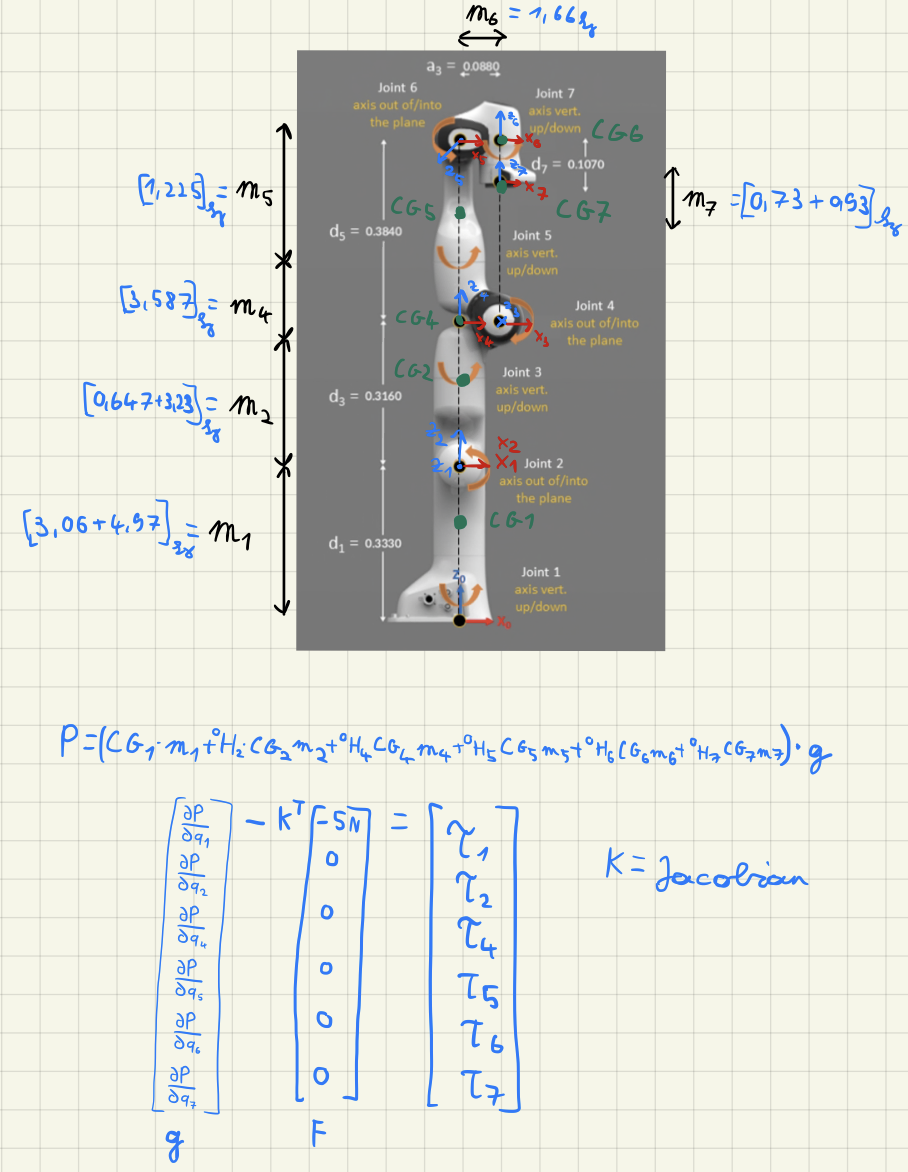

In [27]:
Image("HW5.png")

Based on the signs above I created 6 different links, and calculated their mass based on the panda_arm.xacro and hand.xacro files. Since I could not open the given CAD files properly I picked their place and marked them in their local frames, using the corresponding transformation matrices the Potential energy was calculated, also the external force vector was written up according to the description.

In [28]:
m_1=4.97+3.06
m_2=3.228+0.646
m_4=3.58
m_5=1.225
m_6=1.666
m_7=0.73+0.93

m1,m2,m3,m4,m5,m6,m7=symbols('m_1 m_2 m_3 m_4 m_5 m_6 m_7') #symbols
CG1=Matrix([[0],[0],[33.3/2],[1]])
CG2=Matrix([[0],[0],[31.6/2],[1]])
CG4=Matrix([[0],[0],[0],[1]]) #the motor seems heavy so I put the CG to the origo
CG5=Matrix([[0],[38.4/2],[0],[1]]) # this choice is an assumption to make the calculations easier
CG6=Matrix([[0],[0],[0],[1]])
CG7=Matrix([[0],[0],[0],[1]]) #the last link and the end effector has approxiatelly the same weight so I put the CG in the origo
g=9.8

P=((CG1*m1+H_02*CG2*m2+H_04*CG4*m4+H_05*CG5*m5+H_06*CG6*m6+H_07*CG7*m7)*g).subs({q3:0})
P

Matrix([
[-154.84*m_2*sin(q_2)*cos(q_1) + 9.8*m_4*(-a_3*sin(q_2)*sin(q_4)*cos(q_1) - a_3*cos(q_1)*cos(q_2)*cos(q_4) + a_3*cos(q_1)*cos(q_2) - d_3*sin(q_2)*cos(q_1)) + 9.8*m_5*(-a_3*sin(q_2)*sin(q_4)*cos(q_1) - a_3*cos(q_1)*cos(q_2)*cos(q_4) + a_3*cos(q_1)*cos(q_2) - d_3*sin(q_2)*cos(q_1) + d_5*(-sin(q_2)*cos(q_1)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2)) - 19.2*sin(q_2)*cos(q_1)*cos(q_4) + 19.2*sin(q_4)*cos(q_1)*cos(q_2)) + 9.8*m_6*(a_3*((sin(q_2)*sin(q_4)*cos(q_1) + cos(q_1)*cos(q_2)*cos(q_4))*cos(q_5) - sin(q_1)*sin(q_5))*cos(q_6) + a_3*(-sin(q_2)*cos(q_1)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2))*sin(q_6) - a_3*sin(q_2)*sin(q_4)*cos(q_1) - a_3*cos(q_1)*cos(q_2)*cos(q_4) + a_3*cos(q_1)*cos(q_2) - d_3*sin(q_2)*cos(q_1) + d_5*(-sin(q_2)*cos(q_1)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2))) + 9.8*m_7*(a_3*((sin(q_2)*sin(q_4)*cos(q_1) + cos(q_1)*cos(q_2)*cos(q_4))*cos(q_5) - sin(q_1)*sin(q_5))*cos(q_6) + a_3*(-sin(q_2)*cos(q_1)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2))*sin(q_6) - a_3*sin(q_2)*sin(q_4)

The $g(q)$ vector was calculated below.

In [29]:
G_q=Matrix([[P[2].diff(q1)],[P[2].diff(q2)],[P[2].diff(q4)],[P[2].diff(q5)],[P[2].diff(q6)],[P[2].diff(q7)]])
G_q

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           0],
[-154.84*m_2*sin(q_2) + 9.8*m_4*(-a_3*sin(q_2)*sin(q_4) - a_3*c

The mass values are substituted.

In [30]:
G_q=G_q.subs({m1:m_1,m2:m_2,m4:m_4,m5:m_5,m6:m_6,m7:m_7,d1:33.3,d3:31.6,d5:38.4,a3:8.8,d7:20.7})
F=Matrix([[-5],[0],[0],[0],[0],[0]])
G_q

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                         0],
[-336.7476*(-sin(q_2)*sin(q_4) - cos(q_2)*cos(q_4))*sin(q_6)*cos(q_5) + 286.83424*(sin(q_2)*sin(q_4) + cos(q_2)*cos(q_4))*cos(q_5)*cos(q_6) + 286.83424*(-sin(q_2)*cos(q_4) + sin(q_4)*cos(q_2))*sin(q_6) - 336.7476*(-sin(q_2)*cos(q_4) + sin(q_4)*cos(q_2))*cos(q_6) - 701.21744*sin(q_2)*sin(q_4) - 1943.12832*sin(q_2)*cos(q_4) - 3117.85824*sin(q_2) + 1943.12832*sin(q_4)*cos(q_2) - 701.21744*cos(q_2)*cos(q_4) + 701.21744*cos(q_2)],
[                                              286.83424*(-sin(q_2)*sin(q_4) - cos(q_2)*cos(q_4))*cos(q_5)*cos(q_6) - 336.7476*(sin

Running a loop to calculate to do the inverse kinematics, first calculate the velocity vector, from that using the inverse Jacobian  we get $\dot{q}$, by numerical integration we get $q$ and using the transformation matrix we calculate the $Y,Z$ coordiantes in each iteration. The code is pretty much the same as it was in HW4 just the time is adjusted and there is a torque calculation extension.
In each cycle the $\tau$ values are calculated based on the matrix equation written up on the figure above, the values are plotted below.
The loop runs for a while but the results seem reasonable and the circle looks nice.

In [31]:
theta_dot=2*pi/200
t=0
V=Matrix([[0],[0],[0],[0],[0],[0]])
Q=Matrix([[0.0],[0.0],[pi/2],[0.0],[pi],[0.0]])
i=0
r=10
x=[]
y=[]
z=[]
tau_1=[]
tau_2=[]
tau_4=[]
tau_5=[]
tau_6=[]
tau_7=[]
time=[]
Tau=Matrix([[0],[0],[0],[0],[0],[0]])
Plot=Matrix([[0],[0],[0],[0]])
A=H_07_inv.col(-1)
while(i<=200):
    
    V[1]=(-r*sin(pi/2+theta_dot*i)*theta_dot).evalf()
    V[2]=(r*cos(pi/2+theta_dot*i)*theta_dot).evalf()
    #print(Plot[2])
    #Plot=(H_07_inv.col(-1)).subs({q1:Q[0],q2:Q[1],q4:Q[2],q5:Q[3],q6:Q[4],q7:Q[5]}).evalf()
    K=M.subs({q1:Q[0],q2:Q[1],q4:Q[2],q5:Q[3],q6:Q[4],q7:Q[5]}).evalf()
    Q_dot=K.inv().evalf()*V
    Q=Q+1*Q_dot
    
    Tau = G_q.subs({q1:Q[0],q2:Q[1],q4:Q[2],q5:Q[3],q6:Q[4],q7:Q[5]}).evalf()-K.T*F
    tau_1.append(Tau[0]/100)
    tau_2.append(Tau[1]/100)
    tau_4.append(Tau[2]/100)
    tau_5.append(Tau[3]/100)
    tau_6.append(Tau[4]/100)
    tau_7.append(Tau[5]/100)
    time.append(i)
    
    #Q[0]=Q[0]+0.25*Q_dot[0]
    #Q[1]=Q[1]+0.25*Q_dot[1]
    #Q[2]=Q[2]+0.25*Q_dot[2]
    #Q[3]=Q[3]+0.25*Q_dot[3]
    #Q[4]=Q[4]+0.25*Q_dot[4]
    #Q[5]=Q[5]+0.25*Q_dot[5]
    Plot=(A.subs({q1:Q[0],q2:Q[1],q4:Q[2],q5:Q[3],q6:Q[4],q7:Q[5]})).evalf()
    x.append(Plot[0])
    y.append(Plot[1])
    z.append(Plot[2])
    ## 2D plot essentials
    #print(Plot[2])
    #plt.plot(Plot[0],Plot[1], Plot[2], color='green', linestyle='solid', linewidth = 3, 
     #    marker='o')
    #
    i=i+1

(-2.0, 2.0)

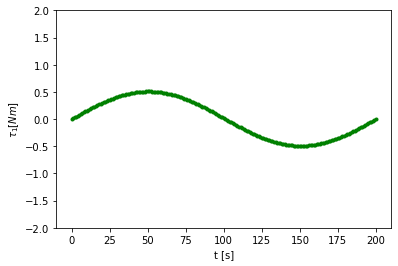

In [32]:
plt.plot(time,tau_1, color='green', linestyle='solid', linewidth = 1, 
        marker='.')
plt.ylabel('$\\tau_1 [Nm]$')
plt.xlabel('t [s]')
plt.ylim((-2,2))

(25.0, 30.0)

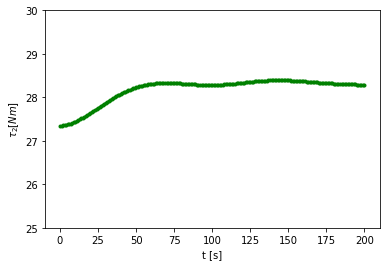

In [33]:
plt.plot(time,tau_2, color='green', linestyle='solid', linewidth = 1, 
        marker='.')
plt.ylabel('$\\tau_2 [Nm]$')
plt.xlabel('t [s]')
plt.ylim((25,30))

(-25.0, -20.0)

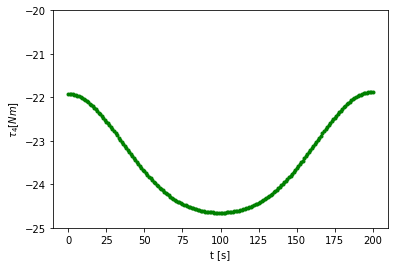

In [34]:
plt.plot(time,tau_4, color='green', linestyle='solid', linewidth = 1, 
        marker='.')
plt.ylabel('$\\tau_4 [Nm]$')
plt.xlabel('t [s]')
plt.ylim((-25,-20))

(-5.0, 5.0)

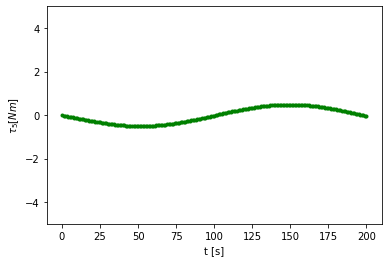

In [35]:
plt.plot(time,tau_5, color='green', linestyle='solid', linewidth = 1, 
        marker='.')
plt.ylabel('$\\tau_5 [Nm]$')
plt.xlabel('t [s]')
plt.ylim((-5,5))

(0.0, 5.0)

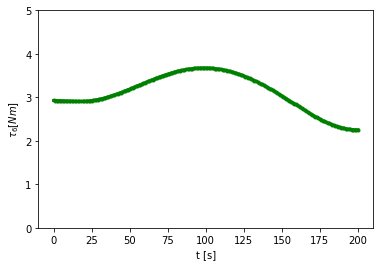

In [36]:
plt.plot(time,tau_6, color='green', linestyle='solid', linewidth = 3, 
        marker='.')
plt.ylabel('$\\tau_6 [Nm]$')
plt.xlabel('t [s]')
plt.ylim((0,5))

(-1.0, 1.0)

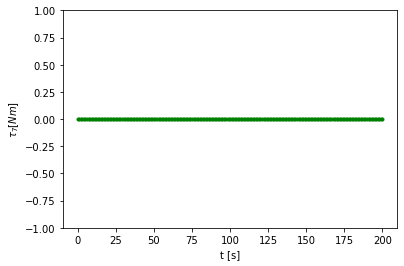

In [37]:
plt.plot(time,tau_7, color='green', linestyle='solid', linewidth = 1, 
        marker='.')
plt.ylabel('$\\tau_7 [Nm]$')
plt.xlabel('t [s]')
plt.ylim((-1,1))

3D plot

Text(0.5, 0.5, '$Y$')

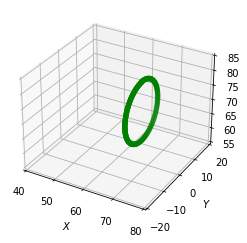

In [38]:
ax = plt.axes(projection='3d')
ax.set_aspect('equal','box')
ax.axes.set_xlim3d(left=40, right=80) 
ax.axes.set_ylim3d(bottom=-20, top=20) 
ax.axes.set_zlim3d(bottom=55, top=85) 
ax.scatter3D(x, y, z, color='green');
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')